<a href="https://colab.research.google.com/github/RandomAnass/Jupyter-books/blob/main/Tirage%20d'importance%20auto-normalis%C3%A9%20%26%20rSVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import *
import numpy as  np  
import scipy as sp
from pylab import *
import matplotlib.pyplot as plt

Auteurs :  AL AMMIRI Anass, WANG Ruiqi

# Exercice 1 (Tirage d'importance auto-normalisé)

En cours vous avez vu la notion de tirage d'importance afin de tenter d'améliorer les performances de l'estimateur de Monte Carlo naïf pour l'estimation d'une espérance. Nous allons revenir sur cette problématique en généralisant son cadre d'application : la densité "naturelle" $f$ est connue à une constante multiplicative près (et même parfois la densité d'importance $p$ également). Nous sommes donc dans la situtation où

$$f(x) = c_f f_0(x), \qquad p(x) = c_p p_0(x), \qquad x \in \mathbb{R},$$

où les constantes de normalisation $c_f$ et $c_p$ sont évidemment données par
$$c_f^{-1} = \int_\mathbb{R} f_0(x) \mbox{d$x$}, \qquad c_p^{-1} = \int_\mathbb{R} p_0(x) \mbox{d$x$}.$$

Dans la suite, notre objectif sera d'estimer la quantité (supposée finie)
$$I = \int_\mathbb{R} h(x) f(x) \mbox{d$x$},$$
pour une fonction donnée $h$.

1. Montrez que l'on peut écrire

$$I = \frac{\mathbb{E}[h(X) w(X)]}{\mathbb{E}[w(X)]}, \qquad X \sim p,$$
où $w: x \mapsto w(x)$ est une fonction connue que vous déterminerez et qui fera intervenir les fonctions $p_0$ et $f_0$.

$$I = \int_\mathbb{R} h(x) f(x) \mbox{d$x$} = \frac{\int_\mathbb{R} h(x) \frac{f_0(x)}{p_0(x)} p(x) \mbox{d$x$}}{\int_\mathbb{R} \frac{f_0(x)}{p_0(x)} p(x) \mbox{d$x$}} = \frac{\int_\mathbb{R} h(x) w(x) p(x) \mbox{d$x$}}{\int_\mathbb{R} w(x) p(x) \mbox{d$x$}} = \frac{\mathbb{E}[h(X) w(X)]}{\mathbb{E}[w(X)]},\qquad w(x) = \frac{f_0(x)}{p_0(x)}$$

2. Donnez deux estimateurs de Monte Carlo "naïfs", notés $\hat{N}_n $ et $\hat{D}_n$, pour le numérateur et le dénominateur de l'expression précédente, utilisant $n$ variables aléatoires indépendantes $X_1,\dots,X_n$ de même loi que $X$. En déduire un estimateur $\hat{I}_n$ pour $I$, où $\hat{N}_n$ et $\hat D_n$ sont fonction des mêmes $n$ variables aléatoires. 

$$\hat{N}_n = \frac{1}{n} {\sum_{i=1}^n h(X_i) w(X_i)}, \qquad \hat{D}_n = \frac{1}{n} {\sum_{i=1}^n w(X_i)}, \qquad \hat{I}_n = \frac{\frac{1}{n} {\sum_{i=1}^n h(X_i) w(X_i)}}{\frac{1}{n} {\sum_{i=1}^n w(X_i)}}$$

3. En quoi ce nouvel estimateur se distingue de l'estimateur par tirage d'importance que vous avez vu en cours ? En quoi répond-il au cadre de travail posé en introduction ?

L'estimateur par tirage d'importance est sous la forme : 
$ \hat{I}_n = \frac{1}{n} \sum_{i=1}^n h(Z_i) \frac{f_0(Z_{i})}{p_0(Z_{i})}$. Avec Z de densité $p_0$. \\
Sauf que dans notre cas $f_0$ est connue à une constante multiplicative près. D'où l'intérêt du terme ${\mathbb{E}[w(X)]}$.


4. Montrez que, sous des hypothèses que vous préciserez, $\hat I_n$ est un estimateur fortement convergent, i.e., $\hat I_n \to I$ p.s. lorsque $n \to \infty$.

Pour $n$ variables aléatoires indépendantes $X_1,\dots,X_n$ de même loi que $X$, et $h$ et $w$ deux fonctions réelles, on a selon la loi forte des grands nombres : $\hat{N}_n$ converge ps vers $\mathbb{E}[w(X)]$, de même $\hat{D}_n$ vers $\mathbb{E}[w(X)]$ (qui est strictement postive, sinon $f_0$ est nulle). D'où la convergence presque sûre de $\hat{I}_n$.
 
$$\hat{N}_n = \frac{1}{n} {\sum_{i=1}^n h(X_i) w(X_i)} \to \mathbb{E}[h(X) w(X)], \qquad \hat{D}_n = \frac{1}{n} {\sum_{i=1}^n w(X_i)}\to \mathbb{E}[w(X)]$$

$$\hat{I}_n = \frac{\frac{1}{n} {\sum_{i=1}^n h(X_i) w(X_i)}}{\frac{1}{n} {\sum_{i=1}^n w(X_i)}}\to I $$ 

5. Selon vous $\hat I_n$ est-il sans bians pour $I$ ?

Oui
🟥

6. Calculez $\mbox{Var}(\hat N_n)$, $\mbox{Var}(\hat D_n)$ et $\mbox{Cov}(\hat N_n, \hat D_n)$. En déduire que l'expression suivante
$$\sum_{i=1}^n \omega_i^2 \{h(X_i) - \hat I_n\}^2, \qquad X_1, \ldots, X_n \stackrel{iid}{\sim} p,$$
est un estimateur de la variance (approchée) de $\hat I_n$ avec
$$\omega_i = \frac{w(X_i)}{\sum_{j=1}^n w(X_j)}.$$

Astuce : La méthode delta est votre meilleur ami pour obtenir la dernière expression !

* Pour $\mbox{Var}(\hat N_n) $ \begin{align}
\mbox{Var}(\hat N_n)    &  = & Var(\frac{1}{n} {\sum_{i=1}^n h(X_i) w(X_i)}) \\
  &  = & \frac{1}{n^2} Var( {\sum_{i=1}^n h(X_i) w(X_i)}) \\
   &  = & \frac{1}{n^2} \sum_{i=1}^n Var( { h(X_i) w(X_i)}) \text{    (par indépendance)}\\ 
   &  = & \frac{1}{n^2} \sum_{i=1}^n Var( { h(X_i) w(X_i)}) \\
   &  = & \frac{1}{n} Var( { h(X) w(X)}) \\
   &  = & \frac{1}{n} Var( { h(X) \frac{f_0(X)}{p_0(X)}}) \\
\end{align}

* Pour $\mbox{Var}(\hat D_n) $ \begin{align*}
\mbox{Var}(\hat D_n)    &  = & Var(\frac{1}{n} {\sum_{i=1}^n w(X_i)}) \\
  &  = & \frac{1}{n^2} Var( {\sum_{i=1}^n w(X_i)}) \\
   &  = & \frac{1}{n^2} \sum_{i=1}^n Var( { w(X_i)}) \text{    (par indépendance)}\\ 
   &  = & \frac{1}{n^2} \sum_{i=1}^n Var( {w(X_i)}) \\
   &  = & \frac{1}{n} Var({w(X)}) \\
   &  = & \frac{1}{n} Var( { \frac{f_0(X)}{p_0(X)}}) \\
\end{align*}

* Pour $\mbox{Cov}(\hat N_n, \hat D_n)$ \begin{align*}
\mbox{Cov}(\hat N_n, \hat D_n)   &  = & Cov(\frac{1}{n} {\sum_{i=1}^n h(X_i) w(X_i)}, \frac{1}{n} {\sum_{i=1}^n w(X_i)}) \\
  &  = & \frac{1}{n^2}Cov( {\sum_{i=1}^n h(X_i) w(X_i)}, {\sum_{i=1}^n w(X_i)}) \\
   &  = & \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n Cov( h(X_i) w(X_i), w(X_j)) \\ 
   &  = & \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n Cov( h(X_i) w(X_i), w(X_i))   \\ \text{    ( pour $ i \neq j$ la covariance est nulle par indépendance)}\\
   &  = & \frac{1}{n} Cov( h(X) w(X), w(X))   \\
\end{align*}



Pour trouver l'expression de l'estimateur on utilise la délta méthode. \\
On note :

*   $\Psi = ( w(X),h(X)w(X))$
*   $\hat{\Psi}_n = \mbox{Var} (\hat D_n, \hat N_n )$
*   $\mathbb{E}_n = \mathbb{E} (h(X)w(X))$
*   $\mathbb{E}_d = \mathbb{E} (w(X))$
*   $V_n = \mbox{Var} (h(X)w(X))$
*   $V_d = \mbox{Var} (w(X))$
*   $\theta = (\mathbb{E}_d,\mathbb{E}_n)$
*   $Cov= Cov( h(X) w(X), w(X)) $

La suite des variables aléatoires $\hat{\Psi}_1, \ldots, \hat{\Psi}_n$. Par le théorème de central limite: $\sqrt{n}(\hat{\Psi}_n - \mathbb{E}(\Psi)) \xrightarrow{L} \mathcal{N}(0,\Sigma)$. Avec $\Sigma $ la matrice de covariance de $Ψ$. On pose la fonction $g$, telle que $ g(x,y)= \frac{x}{y}$. Par la delta méthode :
${\sqrt{n}[g(\hat{\Psi}_n )-g(\Psi)]\,\xrightarrow{L}\,\mathcal{N}\left(0,\nabla g(\theta)\Sigma \nabla g(\theta)^T\right)}$ avec $\nabla g(\theta)$ la matrice jacobienne de $g$ en $\theta$.

Donc : ${\sqrt{n}[\hat{I}_n -I]\,\xrightarrow{L}\,\mathcal{N}\left(0,\nabla g(\theta)\Sigma \nabla g(\theta)^T\right)}$
Alors :  $\hat{I}_n \,\xrightarrow{L}\,\mathcal{N}\left(I,\frac{1}{n}\nabla g(\theta)\Sigma \nabla g(\theta)^T\right)$
 
Donc l'expression de la variance (approchée ) de $\hat{I}_n$ est : $\frac{1}{n}\nabla g(\theta)\Sigma \nabla g(\theta)^T = \frac{1}{n \mathbb{E}_d^2} \left( V_n - 2 \frac{\mathbb{E}_n}{\mathbb{E}_d}Cov+  \frac{\mathbb{E}_n^2}{\mathbb{E}_d^2}V_d \right) =  \frac{1}{n \mathbb{E}(w(X))^2} \left( V(h(X)w(X)) - 2 \frac{\mathbb{E}(h(X)w(X))}{\mathbb{E}(w(X))}Cov(h(X)w(X),w(X))+  \left( \frac{\mathbb{E}(h(X)w(X))}{\mathbb{E}(w(X))} \right)^2 V(w(X)) \right) = \frac{1}{n \mathbb{E}(w(X))^2} \left( V(h(X)w(X)) - 2 \frac{\mathbb{E}(h(X)w(X))}{\mathbb{E}(w(X))}Cov(h(X)w(X),w(X))+  \left( \frac{\mathbb{E}(h(X)w(X))}{\mathbb{E}(w(X))} \right)^2 V(w(X)) \right) = \frac{1}{n \mathbb{E}(w(X))^2} \left( V(h(X)w(X)) - 2 I.Cov(h(X)w(X),w(X))+  I^2 V(w(X)) \right) = \frac{1}{n \mathbb{E}(w(X))^2} \left( V(h(X)w(X)) - 2 Cov(h(X)w(X),w(X)I)+ V(w(X) I) \right) = \frac{1}{n \mathbb{E}(w(X))^2} \left( V(h(X)w(X)) - 2 Cov(h(X)w(X),w(X)I)+ V(w(X) I) \right)=  \frac{ Var(h(X)w(X)- w(X)I) }{n \mathbb{E}(w(X))^2} = \frac{ Var(h(X)w(X)- w(X)I) + \stackrel{\mathbb{E}(h(X)w(X)- w(X)I)=0}{\mathbb{E}(h(X)w(X)- w(X)I)^2} }{n \mathbb{E}(w(X))^2} =  \frac{ \mathbb{E}\left( \left( h(X)w(X)- w(X)I \right)^2 \right) }{n \mathbb{E}(w(X))^2} \stackrel{empiriquement}{=}  \frac{1}{n} \frac{\frac{1}{n}\sum_{i=1}^n  \{h(X_i).w(X_i) - \hat I_n.w(X_i)\}^2}{\left( \frac{1}{n} \sum_{i=1}^n w(X_i) \right) ^2} = \frac{\sum_{i=1}^n w(X_i) ^2 \{h(X_i) - \hat I_n\}^2}{\left(\sum_{i=1}^n w(X_i) \right) ^2}= \sum_{i=1}^n \omega_i^2 \{h(X_i) - \hat I_n\}^2$ 

Pour $\omega_i = \frac{w(X_i)}{\sum_{j=1}^n w(X_j)}$ . Cqfd 

7. En déduire un intervalle de confiance (symétrique) pour $I$ de niveau asymptotique $1 - \alpha$.

Par le théorèm centrale limite (déjà appliquée) et par le théorème de Slutsky on a comme IC asymptotique $Ξ_n= \left[\hat I_n  - z_{1-α/2} \sqrt{\frac{\sum_{i=1}^n \omega_i^2 \{h(X_i) - \hat I_n\}^2}{n}} , \hat I_n  + z_{1-α/2} \sqrt{\frac{\sum_{i=1}^n \omega_i^2 \{h(X_i) - \hat I_n\}^2}{n}} \right]$ 

Avec $\omega_i = \frac{w(X_i)}{\sum_{j=1}^n w(X_j)}$, et $z_{1-α/2}$ le quantile $1-α/2$ de la loi normale.

8. Application numérique. On considère le cas où $h(x) = 1_{\{x \in A\}}$, $A \subset \mathbb{R}$, de sorte que $I$ est la probabilité d'appartenir à $A$ sous la densité $f$. Pour cette application numérique nous allons considérer le cas où $A = (4, \infty)$ et $f$ est la densité d'une $N(0,1)$.

  a) Définissez un estimateur de Monte Carlo naïf pour $I$.
  
  b) Définissez un estimateur par tirage d'importance pour $I$ avec une loi d'importance que vous choisirez.
  
  c) Définissez un estimateur par tirage d'importance auto-normalisé pour $I$ basé sur celui de b).
  
  d) Commentez les résultats obtenus

In [ ]:
from scipy.stats import norm

def f(x):
  return (1/sqrt(2*np.pi)*np.exp(-x**2/2))

def h(x):
  return(x>4).astype(int) 

def q(x):
  return np.exp(-(x-4))

def w(x):
  return np.divide(f(x),q(x))

def hw(x):
  return np.multiply(h(x),w(x))

  a) Définissez un estimateur de Monte Carlo naïf pour $I$.

 $\hat I_n = \frac{1}{n} \sum_{i=1}^n  𝟙_{\{X_n \geq 4 \}} f(X_n)$

In [ ]:
n=50
def MC1(n):
  X=np.random.normal(size=n)
  I=mean(np.multiply((X>4).astype(int)  ,X))
  return I
MC1(n)

0.0

In [ ]:

n_values=list(range(0,1000,100))
I_values = [MC1(n) for n in n_values]
print(I_values)
#plt.plot(n_values,I_values)
#plt.title("L'estimation de I pour différentes valeurs de n ")
#plt.show()

[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Nous pouvons voir qu'il y a un problème ici, car presque tous les échantillons sont plus petits que 4. Et pour la variance :

In [ ]:
n=10000
X=np.random.normal(size=n)
np.var(np.multiply((X>4).astype(int)  ,X))

0.0021943521469248617

 b) Définissez un estimateur par tirage d'importance pour $I$ avec une loi d'importance que vous choisirez.

On prend la loi d'importance $ \begin{equation}
    q(x)=
    \begin{cases}
      exp(-(x-4)) = exp(-x).exp(4) , & \text{if}\ x \geq 4 \\
      0  & \text{otherwise}
    \end{cases}
  \end{equation} $ , pour ce choix on a utilisé cette [référence](https://www.math.arizona.edu/~tgk/mc/book_chap6.pdf) où la variance est aussi calculé.

 $\hat I_n = \frac{1}{n} \sum_{i=1}^n   𝟙_{\{Z_n \geq 4 \}} \frac{ f(Z_n)}{q(Z_n)}$

In [ ]:
def MC2(n):
  Z= np.random.exponential(scale=1.0, size=n)
  I=mean(np.multiply((Z>4).astype(int)  ,np.divide(f(Z),q(Z))))
  return I

n=10000
MC2(n)

5.483400921877393e-07

La variance:

In [ ]:
n=10000
Z=np.random.exponential(scale=1.0, size=n)
np.var(np.multiply((Z>4).astype(int)  ,np.divide(f(Z),q(Z))))

5.070188557023406e-11

La variance est plus petite par rapport à la première méthode 

c) Définissez un estimateur par tirage d'importance auto-normalisé pour  I  basé sur celui de b)

On utilise les résultats des questions précédentes.

In [ ]:
def MC3(n):
  X=np.random.normal(scale=1.0, size=n)
  return np.mean(hw(X))/np.mean(w(X))
n=10000
MC3(n)

0.0

Pour la variance :

In [ ]:
n=10000
Z=np.random.normal(scale=1.0, size=n)
f_z=f(Z)
q_z=q(Z)
np.var([np.mean(f_z[0:n])/np.mean(q_z[0:n]) for n in range(2,len(f_z)) ])

7.45230411377179e-09

d) Commentez les résultats obtenus

In [ ]:
n=1000000
I_exact=1-norm.cdf(4)
print(f"Valeur exacte: I={Iexact}")
I=MC1(n)
print(f"Estimation naïve: I={I}")
erreur = np.linalg.norm(I_exact-I)
print(f"Erreur: {I}")
I=MC2(n)
print(f"Estimation par tirage d'importance: I={I}")
erreur = np.linalg.norm(I_exact-I)
print(f"Erreur: {I}")
I=MC3(n)
print(f"Estimation par tirage d'importance auto-normalisé: I={I}")
erreur = np.linalg.norm(I_exact-I)
print(f"Erreur: {I}")

Valeur exacte: I=3.167124183311998e-05
Estimation naïve: I=0.00014548439116039618
Erreur: 0.00014548439116039618
Estimation par tirage d'importance: I=5.88678965280222e-07
Erreur: 5.88678965280222e-07
Estimation par tirage d'importance auto-normalisé: I=2.1298953023364217e-07
Erreur: 2.1298953023364217e-07


On remarque que l'erreur la plus petite est celle du tirage auto-normalisé (ceci pour plusieurs essais)

Pour la variance (empirique):

In [ ]:
n=1000000

n_values=list(range(0,1000000,100000))
I_values_1 =[]
I_values_2 =[]
I_values_3 = []
for n in n_values :
  X=np.random.normal(size=n)
  I_values_1.append(np.var(np.multiply((X>4).astype(int)  ,X)))
  Z=np.random.exponential(scale=1.0, size=n)
  I_values_2.append(np.var(np.multiply((Z>4).astype(int)  ,np.divide(f(Z),q(Z)))))
  Z=np.random.normal(scale=1.0, size=n)
  f_z=f(X)
  q_z=q(X)
  I_values_3.append(np.var([np.mean(f_z[0:n])/np.mean(q_z[0:n]) for n in range(2,len(f_z)) ]))

plt.plot(n_values,I_values_1, label = "Monte Carlo naif")
plt.plot(n_values,I_values_2, label = "Echantillonnage d’importance")
plt.plot(n_values,I_values_3, label = "Tirage d'importance auto-normalisé ")
plt.title("Variance empirique pour différentes valeurs de n pour les trois méthodes")
plt.show()



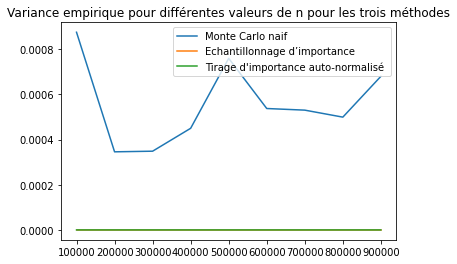

In [ ]:
plt.plot(n_values,I_values_1, label = "Monte Carlo naif")
plt.plot(n_values,I_values_2, label = "Echantillonnage d’importance")
plt.plot(n_values,I_values_3, label = "Tirage d'importance auto-normalisé ")
plt.title("Variance empirique pour différentes valeurs de n pour les trois méthodes")
plt.legend()

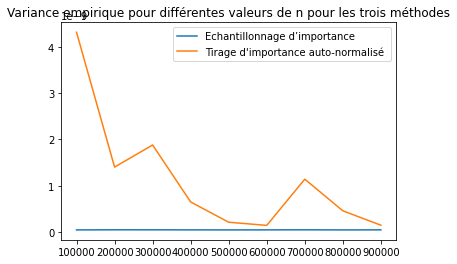

In [ ]:

plt.plot(n_values,I_values_2, label = "Echantillonnage d’importance")
plt.plot(n_values,I_values_3, label = "Tirage d'importance auto-normalisé ")
plt.title("Variance empirique pour différentes valeurs de n pour les trois méthodes")
plt.legend()

La troisième méthode est meilleure en termes de précision.
Dans ce cas, la variance empirique est plus petite pour la secondes méthode, alors qu'elle décroît avec n pour la troisième méthode (qui est celle qui est prouvée). Il existe d'autres méthodes pour diminuer la variance asymptotiquement à chaque fois (mise à jour des poids, estimations cumulées..).
Bien que l'exemple que nous avons soit particulier, si nous n'ayons pas choisi une bonne loi d'importance ou si nous ne connaissions pas la constante multiplicative on aurait pas le même résultat. Il est préférable d'utiliser la troisième méthode (mem.

Nous avons également confirmé que la méthode du tirage est meilleure que la méthode naive.

# Exercice 2 (Décomposition en valeurs singulières randomisée)

La **décomposition en valeurs singulières (SVD)** d'une matrice $A \in \mathbb{R}^{m\times n}$, avec $m \ge n$, s'écrit sous la forme 
$$
\tag{1}
A = U S V^T 
$$
où $U = [u_1, \dots, u_n]\in \mathbb{R}^{m\times m}$ et  $V= [v_1, \dots, v_n]\in \mathbb{R}^{n\times n}$ sont des matrices orthonormées. Les $u_1, \dots, u_m$ sont appelés vecteurs singuliers à gauche, ils forment une base pour l'espace engendré par les colonnes de $A$. De même les $v_1, \dots, v_n$ sont les vecteurs singuliers à droite et forment une base pour l'espace engendré par les lignes de $A$. 
La matrice $S = \mathrm{diag}(\sigma_1, \dots, \sigma_n)$ de $\mathbb{R}^{m \times n}$ est une matrice rectangulaire formée des valeurs singulières de la matrice $A$ notées $\sigma_1\ge \dots \ge \sigma_n \ge 0$. 

Dans certaines applications (e.g. compression d'image, réduction de modèles), il peut être intéressant de considérer la SVD tronquée à $r$ termes, avec $r\le n$, de la matrice $A$. On la note 

$$
\tag{2}
A_r = \sum_{i=1}^r [u_1, \dots, u_r]\mathrm{diag}(\sigma_1, \dots, \sigma_{r}) [v_1, \dots, v_r]^T = \sum_{i=1}^r\sigma_i u_iv_i^T,
$$
qui est une matrice de rang au plus $r$. 

Le theorème d'Eckart-Young assure que $A_r$ est solution du problème de meilleure approximation de $A$ par une matrice de rang au plus $r$, 
$$
\tag{3}
 \| A-A_r \| := \min_{Z \in R^{m \times n}, \mathrm{rang}(Z)\le r}\| A-Z \|,
$$
avec comme norme matricielle la norme spectrale ou la norme de Frobenius. 
- Pour la norme spectrale $\|\cdot\|:=\|\cdot\|_2$ l'erreur d'approximation est donnée par 
$$
\| A-A_r \|_2  = \sigma_{r+1},
$$
- Pour la norme de Frobenius $\|\cdot\|:=\|\cdot\|_F$ l'erreur d'approximation est donnée par 
$$
\| A-A_r \|_F  = \sqrt{\sum_{i=r+1}^n\sigma^2_{i}}.
$$



**Question 1.** 

 Considérer une matrice dont les entrées sont des variables aléatoires indépendantes qui suivent une loi uniforme discrete dans $\{0,\dots,9\}$.
- En utilisant la commande `numpy.linalg.svd()` de Python, tester la décomposition en valeurs singulières de cette matrice. Afficher les valeurs singulières de $A$. 
- Calculer $A_r$ une approximation de rang $r$ de $A$ et donner les erreurs d'approximation en norme spectrale et de Frobenius.

On prendra par la suite $m=20, n=15$ et $r=5$ pour les tests numériques.



In [ ]:
#definition de la matrice A
n=15
m=20
entries = np.random.randint(0, 9+1, size= n*m) 
A= np.reshape(entries, (m, n))
A

array([[8, 5, 7, 7, 0, 2, 0, 6, 0, 8, 6, 3, 5, 2, 5],
       [0, 2, 8, 3, 6, 3, 5, 2, 3, 4, 2, 6, 3, 9, 3],
       [8, 0, 2, 0, 1, 4, 3, 2, 0, 9, 6, 1, 1, 0, 8],
       [8, 0, 8, 8, 7, 0, 1, 5, 0, 7, 3, 5, 5, 4, 8],
       [3, 2, 7, 3, 8, 7, 8, 6, 8, 8, 8, 9, 8, 2, 9],
       [4, 7, 0, 6, 8, 5, 2, 2, 7, 2, 9, 5, 7, 9, 5],
       [9, 8, 7, 7, 0, 2, 9, 7, 5, 5, 9, 5, 4, 2, 2],
       [5, 2, 2, 2, 6, 5, 7, 1, 0, 9, 9, 8, 0, 5, 7],
       [2, 3, 2, 1, 3, 9, 0, 5, 4, 0, 8, 1, 2, 6, 7],
       [9, 7, 8, 2, 8, 5, 6, 4, 6, 5, 1, 4, 7, 9, 3],
       [6, 0, 7, 5, 5, 4, 3, 7, 1, 2, 2, 0, 2, 4, 3],
       [7, 9, 5, 6, 0, 0, 8, 7, 2, 3, 6, 0, 4, 2, 7],
       [2, 5, 0, 4, 4, 2, 1, 7, 2, 4, 9, 7, 1, 1, 5],
       [6, 0, 2, 4, 0, 2, 7, 1, 5, 9, 0, 6, 3, 7, 3],
       [3, 8, 4, 2, 0, 4, 6, 7, 7, 6, 3, 0, 4, 2, 7],
       [2, 3, 9, 1, 9, 9, 6, 6, 8, 0, 6, 2, 2, 9, 7],
       [9, 7, 2, 8, 3, 3, 9, 8, 9, 2, 9, 2, 3, 3, 8],
       [7, 4, 3, 1, 8, 2, 1, 1, 1, 7, 3, 9, 9, 9, 5],
       [7, 7, 9, 6, 9, 1, 2,

In [ ]:
# décomposition en valeurs singulières 
U,S,Vh = np.linalg.svd(A)
print(U, "\n", S, "\n", Vh)

[[-2.08774734e-01  2.34620877e-01 -2.88850371e-01  1.22543532e-01
   1.39100581e-02  1.96469208e-01  2.51839557e-01 -3.13431996e-02
  -1.23290778e-01  5.25220081e-01  3.48876746e-03 -1.86897703e-02
  -1.53495321e-01 -1.64456482e-01  6.04106200e-02  1.85410790e-01
   4.21311501e-02 -9.33343593e-02  5.37674578e-01  1.41716736e-01]
 [-1.85281262e-01 -3.20948591e-01  5.08064583e-03  9.78451304e-02
   1.37814296e-01 -1.09698642e-01 -2.96477995e-01  2.88796061e-02
  -1.04774215e-01  2.58784707e-01 -3.79439936e-01  2.59434647e-01
  -5.44962730e-02 -5.00791726e-02 -2.40801107e-01 -5.62360601e-01
   1.94764940e-01 -5.15255854e-03  1.00580076e-01  1.27619504e-01]
 [-1.51647230e-01  1.55934833e-01 -2.80537532e-01 -3.93367623e-01
   1.52181971e-01  1.49431353e-01  1.96130270e-01 -3.29336193e-01
  -1.37232307e-01 -2.02247777e-01  1.72400583e-01 -1.45791413e-02
  -2.42884733e-02 -2.53683680e-01 -2.09944047e-01 -4.23462180e-01
  -3.58553519e-01 -4.87044675e-02 -1.08861310e-01  7.76696942e-02]
 [-2.25

In [ ]:
print("les valeurs singulières: ", S)

les valeurs singulières:  [81.14251504 22.33329813 19.92933606 17.94414652 15.83212029 15.65264764
 11.61541834 11.2170188   8.72086849  7.99833555  6.96043009  6.09387527
  3.63729034  3.12147252  1.7207727 ]


Vérification :

In [ ]:
import scipy.linalg as la
U@la.diagsvd(S,*(U.shape[1],Vh.shape[0]))@Vh

array([[ 8.00000000e+00,  5.00000000e+00,  7.00000000e+00,
         7.00000000e+00, -1.47846521e-14,  2.00000000e+00,
         5.26029070e-15,  6.00000000e+00, -2.73483985e-15,
         8.00000000e+00,  6.00000000e+00,  3.00000000e+00,
         5.00000000e+00,  2.00000000e+00,  5.00000000e+00],
       [ 2.97930644e-15,  2.00000000e+00,  8.00000000e+00,
         3.00000000e+00,  6.00000000e+00,  3.00000000e+00,
         5.00000000e+00,  2.00000000e+00,  3.00000000e+00,
         4.00000000e+00,  2.00000000e+00,  6.00000000e+00,
         3.00000000e+00,  9.00000000e+00,  3.00000000e+00],
       [ 8.00000000e+00,  1.13878268e-14,  2.00000000e+00,
         5.87809901e-15,  1.00000000e+00,  4.00000000e+00,
         3.00000000e+00,  2.00000000e+00, -2.80585842e-15,
         9.00000000e+00,  6.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.08158142e-14,  8.00000000e+00],
       [ 8.00000000e+00,  1.13674421e-14,  8.00000000e+00,
         8.00000000e+00,  7.00000000e+00, -3.36414170

In [ ]:
np.allclose(A,U@la.diagsvd(S,*(U.shape[1],Vh.shape[0]))@Vh)# np.dot(U[:, :len(S)] * S, Vh))

True

In [ ]:
r=5


Calculons la matrice $A_r$ :

On a $A_r = \sum_{i=1}^r [u_1, \dots, u_r]\mathrm{diag}(\sigma_1, \dots, \sigma_{r}) [v_1, \dots, v_r]^T = \sum_{i=1}^r\sigma_i u_iv_i^T$ :

In [ ]:
#Ur
Ur=U[np.ix_(list(range(len(U))),list(range(r)))]
#Sr
Sr=S[:r]
#Vr
Vhr=Vh[np.ix_(list(range(r)),list(range(Vh.shape[1])))]
Sr

array([81.14251504, 22.33329813, 19.92933606, 17.94414652, 15.83212029])

In [ ]:
#Vr exemple
Vhr=Vh[np.ix_(list(range(r)),list(range(Vh.shape[1])))]
Vhr

array([[-0.31350191, -0.24372383, -0.27013956, -0.23613004, -0.25288055,
        -0.20053127, -0.25793457, -0.26065103, -0.21085107, -0.24536732,
        -0.31606018, -0.24679151, -0.21833357, -0.27657486, -0.29210497],
       [ 0.23878531,  0.26469916, -0.08981383,  0.24396718, -0.51849299,
        -0.18692987,  0.1924538 ,  0.28564061,  0.00874485,  0.04254616,
         0.21281435, -0.29247458, -0.1155718 , -0.48050606,  0.07721237],
       [-0.33415327,  0.23071191, -0.04277932, -0.09537178,  0.08434827,
         0.30499434,  0.0932124 ,  0.19088353,  0.42618107, -0.59888631,
         0.17371963, -0.29320517, -0.11316316,  0.09822258, -0.00548057],
       [ 0.21877162,  0.23548388,  0.40161433,  0.32650863,  0.09254078,
        -0.33312413, -0.1339512 ,  0.17850909, -0.15937526, -0.38718168,
        -0.31087109, -0.05903465,  0.07936016,  0.1931191 , -0.37471508],
       [-0.031724  , -0.26782042,  0.51419471, -0.23200777, -0.02386439,
         0.13425985,  0.22165485,  0.22480197, 

On définit la décomposition en une fonction :

In [ ]:
def rSVD_1(A):
  U,S,Vh = np.linalg.svd(A) 
  #Ur
  Ur=U[np.ix_(list(range(len(U))),list(range(r)))]
  #Sr
  Sr=S[:r]
  #Vr
  Vhr=Vh[np.ix_(list(range(r)),list(range(Vh.shape[1])))]
  return Ur,Sr,Vhr
  
Ur,Sr,Vhr=rSVD_1(A)
Ar=Ur@la.diagsvd(Sr,*(Ur.shape[1],Vhr.shape[0]))@Vhr
Ar

array([[ 8.95974685,  4.64650981,  5.34831695,  6.49441131,  1.27977213,
        -0.04106605,  4.59565044,  5.2554752 ,  0.84610491,  7.01853742,
         4.67582335,  4.1287213 ,  3.91821448,  1.99707888,  4.60482914],
       [ 3.28272648,  1.61932382,  6.52781938,  1.85869933,  7.63727795,
         4.09364879,  2.7562393 ,  2.69448837,  3.18932714,  3.06751539,
         1.60929908,  4.90478764,  4.23052459,  7.65717373,  3.61823309],
       [ 4.93679228,  0.32348869,  1.65450161,  1.42473104,  0.12373696,
         2.78623937,  4.80253997,  2.41645655,  1.71914168,  9.71694979,
         4.65106531,  3.22549369,  2.34755221, -0.50720302,  7.02318192],
       [ 8.57402756,  2.53178219,  7.87656098,  5.23902404,  4.90382365,
         0.86932971,  3.86951549,  4.08056095,  0.48719814,  8.13895897,
         2.05425192,  6.07993759,  5.2423606 ,  5.25005042,  4.55978806],
       [ 5.4726843 ,  2.94165002,  5.89203813,  2.28012079,  6.84737421,
         7.9994919 ,  7.39162526,  5.24243701, 

Vérification des normes :

In [ ]:
#norme spectrale
np.linalg.norm(A-Ar,ord=2)

15.652647638313617

In [ ]:
S[r]

15.652647638313615

In [ ]:
np.isclose(S[r],np.linalg.norm(A-Ar,ord=2))

True

In [ ]:
#norme de Frobenus
sqrt(sum(S[r:]**2))

27.51888777204114

In [ ]:
linalg.norm(A-Ar, ord='fro')

27.51888777204115

In [ ]:
np.isclose(sqrt(sum(S[r:]**2)),linalg.norm(A-Ar, ord='fro'))

True

On peut aussi vérifer avec la ```TruncatedSVD``` de Sklearn :

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=r, n_iter=10, random_state=42)
svd.fit(A)
Ar_sk = svd.transform(A)

print(svd.singular_values_)


[81.14251504 22.33329813 19.92933606 17.94414652 15.83212029]


In [ ]:
S[:r]

array([81.14251504, 22.33329813, 19.92933606, 17.94414652, 15.83212029])

**Question 2.** On considère désormais une version randomisée de la SVD. 
1. On génère une matrice gaussienne $\Omega$ de taille $n \times k$ dont les entrées sont i.i.d. et suivent la loi $\cal{N}(0,1/k)$.
2. On en déduit $Y = A \Omega$. 
3. On calcule la décomposition $QR$ de $Y$.
4. On forme la matrice $B =Q^T A$ de taille $k \times n$.
5. On calcule la SVD de la matrice $B$ notée $\tilde USV^T$
6. Alors la SVD randomisée de la matrice $A$ est donnée par 
$$\hat A_k = U S V^T$$ avec $U =Q \tilde U \in  \mathbb{R}^{m\times k}$, $S \in  \mathbb{R}^{k \times k}$ et $V \in \mathbb{R}^{n\times k}$.

*Remarque : Ici SVD randomisée retourne une décomposition tronquée à $k$ termes.*

*Question 2.a* 

Définir une fonction  `rSVD(A,Omega)` qui prend en argument une matrice $A \in \mathbb{R}^{m \times n}$ et une matrice aléatoire gaussienne $\Omega \in  \mathbb{R}^{n \times k}$ et retourne $U,S,V^T$. Pour la factorisation $QR$ de la matrice $Y$ utiliser `np.linalg.qr()`.




In [ ]:

#definition de la matrice A
n=15
m=20
entries = np.random.randint(0, 9+1, size= n*m) 
A= np.reshape(entries, (m, n))

In [ ]:
k=10
entries = np.random.normal(0, 1/k, size= n*k)
Omega= np.reshape(entries, (n, k))
#Omega


def rSVD(A,Omega):
  Y=A@Omega 
  Q,R = np.linalg.qr(Y)
  B = np.transpose(Q)@A
  U_ , S , Vh = np.linalg.svd(B)
  U = Q @ U_ 
  return U,S,Vh

In [ ]:
rSVD(A,Omega)

(array([[-0.24295666,  0.20911214, -0.24293062,  0.05276083, -0.31596681,
          0.30214748,  0.16522719,  0.08847456, -0.1399176 , -0.07546655],
        [-0.16848859,  0.18517951, -0.047516  , -0.15466959, -0.35063234,
         -0.05480719,  0.16554326, -0.27024564,  0.04138071, -0.04251701],
        [-0.17548436,  0.0928677 ,  0.26968528, -0.34463618,  0.48983575,
          0.26704732,  0.06048475, -0.22841078, -0.07647665, -0.33760688],
        [-0.2968976 ,  0.08205571, -0.27648518, -0.36144564,  0.19105236,
          0.01605749, -0.00316294,  0.19875134, -0.08575054,  0.56527614],
        [-0.20902202, -0.37712235,  0.09696073, -0.23110745, -0.08425176,
         -0.05900037, -0.41447744,  0.19981562, -0.08020377,  0.08899209],
        [-0.22436721, -0.36921733, -0.11799808, -0.11087539,  0.22197215,
          0.29083374,  0.02287996, -0.02094831,  0.3066016 , -0.02220439],
        [-0.18689386,  0.40479101,  0.01683913, -0.04302421, -0.09224616,
          0.08114749, -0.0903416

*Question 2.b* 

Reprendre les différents points de la Question 1. pour la fonction la SVD randomisée `rSVD()`.
On considèrera une matrice aléatoire de taille $k=l+r$ avec $l=4$. 


In [ ]:
l =  4
n=15
k=r + l
entries = np.random.randint(0, 9+1, size= n*m) 
A= np.reshape(entries, (m, n))

entries = np.random.normal(0, 1/k, size= n*k)
Omega= np.reshape(entries, (n, k))


In [ ]:
# Valeurs sing. S
#par la méthode de la question 1 
U_1,S_1,Vh_1 = rSVD_1(A)
print(S_1)
U_2,S_2,Vh_2 = rSVD(A,Omega)
print(S_2)
U_3,S_3,Vh_3 = np.linalg.svd(A) 
print(S_3)

[78.2028406  21.80831211 19.88334755 17.5464853  16.91267418]
[77.68442211 21.57704051 19.31971216 16.79758938 14.67452894 12.65156491
 11.51871842 10.66549451  6.51861085]
[78.2028406  21.80831211 19.88334755 17.5464853  16.91267418 14.07579029
 12.90014707 11.56092787 10.34131357  8.70682192  7.56925519  6.75349791
  5.45240487  4.01244576  3.12538132]


Nous avons extrait avec cette méthode les valeurs singulières sans utiliser la méthode svd implémentée, avec une précision acceptable. Il s'agit donc d'un moyen rapide de réduire la dimensionnalité.

**Question 3** 

On va essayer d'améliorer la SVD randomisée en effectuant des puissances itérées de la matrice $A$. Ainsi l'étape 2. de l'algorithme devient :

2. Calculer $Y = A \Omega$\
   Pour $i=1,\dots,p$ faire \
   &nbsp; &nbsp; $Y = A (A^T Y)$\
   Fin pour

*Question 3.a*

Ecrire une fonction `power_iteration(A,Omega,p=3)` renvoyant une matrice $Y$ obtenue par des puissances itérées de $A$. Cette fonction prendra en argument $A, \Omega$ et $p=3$ un paramètre correspondant au nombre de puissances itérés. Ecrire une nouvelle fonction `rSVD2(A,Omega)` où la matrice $Y$ est obtenue par puissances itérées.



In [ ]:
def power_iteration(A,Omega,p=3):
  Y= A@Omega
  for i in range(p):
    Y =  A @ (np.transpose(A)@Y)
  return Y

*Question 3.b* Reprendre les différents points de la Question 2.c. Comparer les résultats obtenus avec `np.linalg.svd()`et `rSVD()`.

In [ ]:
def rSVD_power(A,Omega,p):
  Y=power_iteration(A,Omega,p=3)
  Q,R = np.linalg.qr(Y)
  B = np.transpose(Q)@A
  U_ , S , Vh = np.linalg.svd(B)
  U = Q @ U_ 
  return U,S,Vh

In [ ]:
U_1,S_1,Vh_1 = rSVD_power(A,Omega,3)
print("rSVD power :" , S_1)
U_2,S_2,Vh_2 = rSVD(A,Omega)
print("rSVD :" , S_2)
U_3,S_3,Vh_3 = np.linalg.svd(A) 
print("SVD :" , S_3)

rSVD power : [78.2028406  21.80830967 19.8832032  17.54415591 16.9085791  14.05367681
 12.89877685 11.55815385  9.7562184 ]
rSVD : [77.68442211 21.57704051 19.31971216 16.79758938 14.67452894 12.65156491
 11.51871842 10.66549451  6.51861085]
SVD : [78.2028406  21.80831211 19.88334755 17.5464853  16.91267418 14.07579029
 12.90014707 11.56092787 10.34131357  8.70682192  7.56925519  6.75349791
  5.45240487  4.01244576  3.12538132]


Nous pouvons voir clairement que rSVD_power est bien meilleur que rSVD .
On peut comparer les distances : 

In [ ]:
linalg.norm(A-U_1@la.diagsvd(S_1,*(U_1.shape[1],Vh_1.shape[0]))@Vh_1, ord='fro')


15.716715113498228

In [ ]:
linalg.norm(A-U_2@la.diagsvd(S_2,*(U_2.shape[1],Vh_2.shape[0]))@Vh_2, ord='fro')


24.491259024169523

**Question 4.**

On s'intéresse dans cette dernière question à la compression d'une image de taille $256 \times 256$ : `lena256x256.png`

![lena256x256.png](attachment:lena256x256.png)


- Charger l'image en utilisant `imageio.imread()`. Celle-ci est alors stockée sous forme d'une matrice $A$ de taille $256\times 256$.
- Afin de compresser cette image, il suffit d'appliquer une SVD tronquée de rang $r$  à la matrice $A$. Calculer les approximations de rang $r=50$ pour les trois méthodes étudiées précédemment. Afficher les images compressées obtenues.
- Comparer les erreurs associées (en norme $\|\cdot\|_2$ et $\|\cdot\|_F$) et les temps d'exécution de chacune d'elle.

Commmenter.



In [ ]:
import os
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
image_path = "/content/gdrive/My Drive/Google Collab/lena256x256.png"

In [ ]:
import imageio as iio

im = iio.imread(image_path)

In [ ]:
r = 50

In [ ]:
np.shape(im)

(256, 256)

Méthode 1 (rSVD): 

In [ ]:
import time
n=256
start = time.time()

k=r
entries = np.random.normal(0, 1/k, size= n*k)
Omega= np.reshape(entries, (n, k))
U,S,Vh = rSVD(im,Omega)
A_k = U@la.diagsvd(S,*(U.shape[1],Vh.shape[0]))@Vh

end = time.time()
print(end - start)

0.018517017364501953


Méthode 2 avec k=r+l


In [ ]:

start = time.time()
k= r + l
entries = np.random.normal(0, 1/k, size= n*k)
Omega= np.reshape(entries, (n, k))
U_2,S_2,Vh_2 = rSVD(im,Omega)
A_k_2 = U_2@la.diagsvd(S_2,*(U_2.shape[1],Vh_2.shape[0]))@Vh_2
end = time.time()
print(end - start)

0.02601337432861328


Méthode 3 (power):

In [ ]:
import scipy.linalg as la

start = time.time()
p =3
U_3,S_3,Vh_3 = rSVD_power(im,Omega,p)

A_k_3 =  U_3@la.diagsvd(S_3,*(U_3.shape[1],Vh_3.shape[0]))@Vh_3
end = time.time()
print(end - start)

0.021928071975708008


SVD originale :

In [ ]:
start = time.time()
U_4,S_4,Vh_4 = np.linalg.svd(im) 
A_k_4 =  U_4@la.diagsvd(S_4,*(U_4.shape[1],Vh_4.shape[0]))@Vh_4
end = time.time()
print(end - start)

0.051738739013671875


Comme prévu, moins nous utilisons d'informations et plus la dimension est petite, plus l'algorithme est rapide, même si nous avons gagné beaucoup de temps par rapport aux informations perdues.

Comparaison :

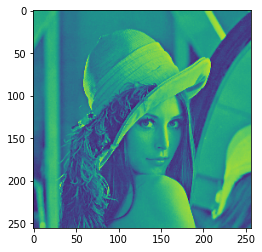

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(im)

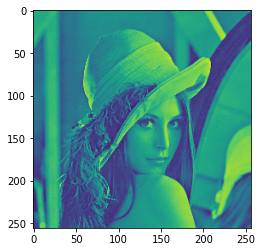

In [ ]:
imgplot = plt.imshow(A_k_4)

La SVD complète donne les mêmes résultats que l'original, comme prévu. 

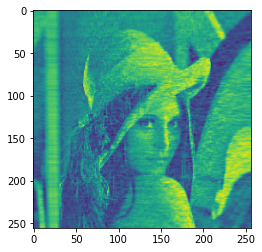

In [ ]:
imgplot = plt.imshow(A_k)

rSVD, est rapide  et donne un bon résultat

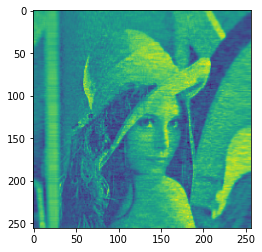

In [ ]:
imgplot = plt.imshow(A_k_2)

également bon résultat pour k>r


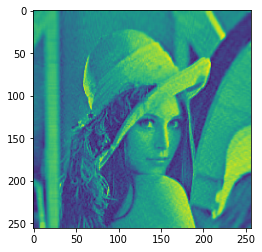

In [ ]:
imgplot = plt.imshow(A_k_3)

Voici également une bonne image presque identique à l'original.
Nous concluons que les méthodes rSVD pourraient nous donner un gain énorme en termes de temps de calcul (et aussi un peu de gain de mémoire).